In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import matplotlib

In [2]:
df = pd.read_csv('NYC_Airbnb/development.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,12783632,NYC Mini Hotel,57230304,Imanuelly,Queens,Elmhurst,40.74037,-73.88610,Private room,75,1,2,2019-05-26,0.92,3,351
1,3463385,Gorgeous room in Manhattan,10698270,Evgenia,Manhattan,Upper East Side,40.76717,-73.95532,Private room,95,1,202,2019-05-27,3.31,2,263
2,17572926,Great 1 Bedroom on Upper East,36578169,James,Manhattan,Upper East Side,40.77984,-73.94725,Entire home/apt,130,2,0,NaN,NaN,1,0
3,33913644,"Modern and bright 2Bed 2Bath Bushwick, Brooklyn",50981314,Ofier,Brooklyn,Bushwick,40.70205,-73.91338,Entire home/apt,150,2,4,2019-07-07,1.64,1,89
4,9405895,Stylish and zen Brooklyn retreat,48775347,Mathieu,Brooklyn,Fort Greene,40.68914,-73.97853,Entire home/apt,325,3,16,2019-04-20,0.42,1,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39111,20678811,Flatbush Comfy Room (Rm# 2),147972663,Hyacinth,Brooklyn,East Flatbush,40.64850,-73.93855,Private room,40,3,58,2019-06-12,2.57,3,306
39112,29630190,Cozy Brooklyn Heights - Private Room,223032162,Dot,Brooklyn,Boerum Hill,40.68602,-73.99023,Private room,65,2,15,2019-05-19,1.80,2,0
39113,3811639,Beautiful sun-filled Loft BROOKLYN,10603767,Samantha,Brooklyn,Bushwick,40.70784,-73.92224,Entire home/apt,150,3,203,2019-06-22,3.42,1,308
39114,2404708,Williamsburg 1 bedroom appartement,12290324,Lara,Brooklyn,Williamsburg,40.71952,-73.96281,Entire home/apt,250,5,21,2019-03-28,0.35,1,284


In [ ]:
df[df['host_id']==57230304]

### Provo a cercare correlazioni

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39103 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39097 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [4]:
X_toenc = df['neighbourhood'].values
cat = list(df['neighbourhood'].unique())
ohe = OneHotEncoder(sparse=False, dtype=int, categories=[cat])
X_hoe = ohe.fit_transform(X_toenc.reshape(-1,1))
df.drop(columns=['name','host_name', 'neighbourhood', 'neighbourhood_group', 'room_type', 'last_review'], inplace=True)
X_enc = np.hstack([df.values, X_hoe])
df_try = pd.DataFrame(X_enc, columns = list(df.columns)+cat)
df_try.fillna(0, inplace=True)
df_try

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,...,Emerson Hill,Mount Eden,Richmondtown,Willowbrook,Arden Heights,Eltingville,Silver Lake,West Farms,Rossville,Woodrow
0,12783632.0,57230304.0,40.74037,-73.88610,75.0,1.0,2.0,0.92,3.0,351.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3463385.0,10698270.0,40.76717,-73.95532,95.0,1.0,202.0,3.31,2.0,263.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,17572926.0,36578169.0,40.77984,-73.94725,130.0,2.0,0.0,0.00,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33913644.0,50981314.0,40.70205,-73.91338,150.0,2.0,4.0,1.64,1.0,89.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9405895.0,48775347.0,40.68914,-73.97853,325.0,3.0,16.0,0.42,1.0,103.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39111,20678811.0,147972663.0,40.64850,-73.93855,40.0,3.0,58.0,2.57,3.0,306.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39112,29630190.0,223032162.0,40.68602,-73.99023,65.0,2.0,15.0,1.80,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39113,3811639.0,10603767.0,40.70784,-73.92224,150.0,3.0,203.0,3.42,1.0,308.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39114,2404708.0,12290324.0,40.71952,-73.96281,250.0,5.0,21.0,0.35,1.0,284.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Outlier detection

In [17]:
clu = DBSCAN(eps=20, min_samples=2)
clu.fit(df_try.values)

DBSCAN(eps=20, min_samples=2)

In [18]:
len(clu.labels_[clu.labels_<0])

38950

In [51]:
thr = 0.05
corr_price = df_try.corr(method='spearman')['price']
corr_price[np.abs(corr_price)>thr]

host_id                          -0.073980
latitude                          0.131657
longitude                        -0.440985
price                             1.000000
minimum_nights                    0.103317
number_of_reviews                -0.057172
calculated_host_listings_count   -0.105323
availability_365                  0.086254
Elmhurst                         -0.055260
Upper East Side                   0.094991
Bushwick                         -0.163688
Greenwich Village                 0.075015
Washington Heights               -0.085835
East Village                      0.095446
Bedford-Stuyvesant               -0.121602
Hell's Kitchen                    0.128458
East Flatbush                    -0.062717
Upper West Side                   0.090722
Murray Hill                       0.085059
Flushing                         -0.065701
Midtown                           0.167925
Harlem                           -0.065366
Financial District                0.108158
Crown Heigh

In [23]:
df_try[df_try['Bushwick']==1]['price'].mean()

85.83600802407221

Escludiamo 'neighbourhood', 'id', 'name', 'calculated_host_listings_count', 'host_name'

In [3]:
df_use = df.drop(columns=['id', 'neighbourhood', 'name', 'host_name', 'calculated_host_listings_count', 'last_review'])
df_use

,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,57230304,Queens,40.74037,-73.88610,Private room,75,1,2,0.92,351
1,10698270,Manhattan,40.76717,-73.95532,Private room,95,1,202,3.31,263
2,36578169,Manhattan,40.77984,-73.94725,Entire home/apt,130,2,0,NaN,0
3,50981314,Brooklyn,40.70205,-73.91338,Entire home/apt,150,2,4,1.64,89
4,48775347,Brooklyn,40.68914,-73.97853,Entire home/apt,325,3,16,0.42,103
...,...,...,...,...,...,...,...,...,...,...
39111,147972663,Brooklyn,40.64850,-73.93855,Private room,40,3,58,2.57,306
39112,223032162,Brooklyn,40.68602,-73.99023,Private room,65,2,15,1.80,0
39113,10603767,Brooklyn,40.70784,-73.92224,Entire home/apt,150,3,203,3.42,308
39114,12290324,Brooklyn,40.71952,-73.96281,Entire home/apt,250,5,21,0.35,284


In [5]:
df_use.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
count,3.911600e+04,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000,31075.000000,39116.000000
mean,6.753109e+07,40.729037,-73.952308,153.406995,7.053073,23.261658,1.376466,112.957613
std,7.863542e+07,0.054373,0.045880,242.218222,20.494289,44.601529,1.683171,131.576326
min,2.438000e+03,40.507080,-74.244420,0.000000,1.000000,0.000000,0.010000,0.000000
25%,7.824647e+06,40.690260,-73.983160,69.000000,1.000000,1.000000,0.190000,0.000000
50%,3.059726e+07,40.723240,-73.955700,108.000000,3.000000,5.000000,0.720000,46.000000
75%,1.074344e+08,40.763130,-73.936530,178.000000,5.000000,23.000000,2.020000,226.000000
max,2.743213e+08,40.913060,-73.716900,10000.000000,1250.000000,629.000000,58.500000,365.000000


In [6]:
df_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   host_id              39116 non-null  int64  
 1   neighbourhood_group  39116 non-null  object 
 2   latitude             39116 non-null  float64
 3   longitude            39116 non-null  float64
 4   room_type            39116 non-null  object 
 5   price                39116 non-null  int64  
 6   minimum_nights       39116 non-null  int64  
 7   number_of_reviews    39116 non-null  int64  
 8   reviews_per_month    31075 non-null  float64
 9   availability_365     39116 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 3.0+ MB


In [7]:
df[df['last_review'].isna()]['number_of_reviews'].unique()

array([0])

In [4]:
df_use.fillna(0, inplace=True)

In [6]:
df_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   host_id              39116 non-null  int64  
 1   neighbourhood_group  39116 non-null  object 
 2   latitude             39116 non-null  float64
 3   longitude            39116 non-null  float64
 4   room_type            39116 non-null  object 
 5   price                39116 non-null  int64  
 6   minimum_nights       39116 non-null  int64  
 7   number_of_reviews    39116 non-null  int64  
 8   reviews_per_month    39116 non-null  float64
 9   availability_365     39116 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 3.0+ MB


In [5]:
y = df_use['price'].values
df_use.drop(columns=['price'], inplace=True)

In [6]:
X_toenc = df_use.loc[:,['neighbourhood_group', 'room_type']].values
cat_1 = list(df_use['neighbourhood_group'].unique())
cat_2 = list(df_use['room_type'].unique())
ohe = OneHotEncoder(sparse=False, dtype=int, categories=[cat_1, cat_2])
X_hoe = ohe.fit_transform(X_toenc)

In [8]:
df_use.drop(columns=['neighbourhood_group', 'room_type'], inplace=True)

In [9]:
X_enc = np.hstack([df_use.values, X_hoe])
df_compl = pd.DataFrame(X_enc, columns = list(df_use.columns)+cat_1+cat_2)
df_compl

,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,availability_365,Queens,Manhattan,Brooklyn,Bronx,Staten Island,Private room,Entire home/apt,Shared room
0,57230304.0,40.74037,-73.88610,1.0,2.0,0.92,351.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,10698270.0,40.76717,-73.95532,1.0,202.0,3.31,263.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,36578169.0,40.77984,-73.94725,2.0,0.0,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,50981314.0,40.70205,-73.91338,2.0,4.0,1.64,89.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,48775347.0,40.68914,-73.97853,3.0,16.0,0.42,103.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39111,147972663.0,40.64850,-73.93855,3.0,58.0,2.57,306.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
39112,223032162.0,40.68602,-73.99023,2.0,15.0,1.80,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
39113,10603767.0,40.70784,-73.92224,3.0,203.0,3.42,308.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
39114,12290324.0,40.71952,-73.96281,5.0,21.0,0.35,284.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [10]:
df_compl = df_compl.astype({'Queens':int, 'Manhattan':int, 'Brooklyn':int, 'Bronx':int, 'Staten Island':int, 'Private room':int, 'Entire home/apt':int, 'Shared room':int})

In [11]:
df_compl

,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,availability_365,Queens,Manhattan,Brooklyn,Bronx,Staten Island,Private room,Entire home/apt,Shared room
0,57230304.0,40.74037,-73.88610,1.0,2.0,0.92,351.0,1,0,0,0,0,1,0,0
1,10698270.0,40.76717,-73.95532,1.0,202.0,3.31,263.0,0,1,0,0,0,1,0,0
2,36578169.0,40.77984,-73.94725,2.0,0.0,0.00,0.0,0,1,0,0,0,0,1,0
3,50981314.0,40.70205,-73.91338,2.0,4.0,1.64,89.0,0,0,1,0,0,0,1,0
4,48775347.0,40.68914,-73.97853,3.0,16.0,0.42,103.0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39111,147972663.0,40.64850,-73.93855,3.0,58.0,2.57,306.0,0,0,1,0,0,1,0,0
39112,223032162.0,40.68602,-73.99023,2.0,15.0,1.80,0.0,0,0,1,0,0,1,0,0
39113,10603767.0,40.70784,-73.92224,3.0,203.0,3.42,308.0,0,0,1,0,0,0,1,0
39114,12290324.0,40.71952,-73.96281,5.0,21.0,0.35,284.0,0,0,1,0,0,0,1,0


In [12]:
df_compl['price'] = y
df_compl.corr(method='spearman')

,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,availability_365,Queens,Manhattan,Brooklyn,Bronx,Staten Island,Private room,Entire home/apt,Shared room,price
host_id,1.000000,0.048983,0.110854,-0.129961,-0.127580,0.109167,0.169329,0.144138,0.007896,-0.129030,0.069800,0.036914,0.079615,-0.099736,0.067467,-0.073980
latitude,0.048983,1.000000,0.034046,0.023540,-0.043509,-0.042687,-0.007393,0.066335,0.657963,-0.755513,0.245300,-0.145449,-0.021663,0.018916,0.008875,0.131657
longitude,0.110854,0.034046,1.000000,-0.121294,0.081359,0.111654,0.068635,0.503036,-0.519012,0.158983,0.216630,-0.150351,0.238540,-0.247304,0.031507,-0.440985
minimum_nights,-0.129961,0.023540,-0.121294,1.000000,-0.175128,-0.247674,0.080427,-0.102509,0.086140,-0.002177,-0.050282,-0.017881,-0.197025,0.217004,-0.068220,0.103317
number_of_reviews,-0.127580,-0.043509,0.081359,-0.175128,1.000000,0.851283,0.237040,0.038918,-0.072618,0.038222,0.020843,0.020298,-0.000948,0.009821,-0.029398,-0.057172
reviews_per_month,0.109167,-0.042687,0.111654,-0.247674,0.851283,1.000000,0.295898,0.077644,-0.080661,0.013723,0.039990,0.030098,0.012784,-0.010353,-0.007920,-0.062021
availability_365,0.169329,-0.007393,0.068635,0.080427,0.237040,0.295898,1.000000,0.098995,-0.019250,-0.076312,0.070836,0.057827,-0.018384,0.001782,0.054794,0.086254
Queens,0.144138,0.066335,0.503036,-0.102509,0.038918,0.077644,0.098995,1.000000,-0.322517,-0.301557,-0.054582,-0.031581,0.102006,-0.109848,0.027033,-0.197008
Manhattan,0.007896,0.657963,-0.519012,0.086140,-0.072618,-0.080661,-0.019250,-0.322517,1.000000,-0.746083,-0.135043,-0.078134,-0.156498,0.159541,-0.011705,0.359786
Brooklyn,-0.129030,-0.755513,0.158983,-0.002177,0.038222,0.013723,-0.076312,-0.301557,-0.746083,1.000000,-0.126266,-0.073056,0.077673,-0.072919,-0.014938,-0.194300


In [13]:
df_compl.drop(columns=['price'], inplace=True)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_compl.values, y, test_size=0.25, random_state=42)

In [23]:
reg = Lasso()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
(mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred))

(49310.60688526809, 0.09987998927278807)

In [25]:
reg2 = make_pipeline(PolynomialFeatures(2), Lasso())
reg2.fit(X_train,y_train)
y_pred2 = reg2.predict(X_test)
(mean_squared_error(y_test, y_pred2), r2_score(y_test, y_pred2))

/Users/teo/Desktop/PoliTo/Data Science Lab/Python /dsl/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.880e+08, tolerance: 1.759e+05
  model = cd_fast.enet_coordinate_descent(


(49178.60920802683, 0.1022894860962773)

### Scale Data

In [15]:
scaler = StandardScaler()
X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

In [28]:
reg3 = Lasso()
reg3.fit(X_train_scal,y_train)
y_pred3 = reg.predict(X_test_scal)
(mean_squared_error(y_test, y_pred3), r2_score(y_test, y_pred3))

(63028.78787141572, -0.15053285283924223)

In [16]:
reg4 = make_pipeline(PolynomialFeatures(3), LinearRegression())
reg4.fit(X_train_scal,y_train)
y_pred4 = reg4.predict(X_test_scal)
(mean_squared_error(y_test, y_pred4), r2_score(y_test, y_pred4))

(2012385730600761.0, -36734260228.85758)

## Provo a cambiare covariate

In [39]:
df_try.fillna(0, inplace = True)
y = df_try['price']
df_try.drop(columns=['price'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df_try.values, y, test_size=0.25, random_state=42)

In [44]:
reg = RandomForestRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

0.07831138867479515

## Da capo

Escludiamo 'id', 'name', 'calculated_host_listings_count', 'host_name', 'last_review'

In [3]:
df_2 = df.drop(columns=['id', 'name', 'host_name', 'calculated_host_listings_count', 'last_review'])

In [4]:
df_2

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,57230304,Queens,Elmhurst,40.74037,-73.88610,Private room,75,1,2,0.92,351
1,10698270,Manhattan,Upper East Side,40.76717,-73.95532,Private room,95,1,202,3.31,263
2,36578169,Manhattan,Upper East Side,40.77984,-73.94725,Entire home/apt,130,2,0,NaN,0
3,50981314,Brooklyn,Bushwick,40.70205,-73.91338,Entire home/apt,150,2,4,1.64,89
4,48775347,Brooklyn,Fort Greene,40.68914,-73.97853,Entire home/apt,325,3,16,0.42,103
...,...,...,...,...,...,...,...,...,...,...,...
39111,147972663,Brooklyn,East Flatbush,40.64850,-73.93855,Private room,40,3,58,2.57,306
39112,223032162,Brooklyn,Boerum Hill,40.68602,-73.99023,Private room,65,2,15,1.80,0
39113,10603767,Brooklyn,Bushwick,40.70784,-73.92224,Entire home/apt,150,3,203,3.42,308
39114,12290324,Brooklyn,Williamsburg,40.71952,-73.96281,Entire home/apt,250,5,21,0.35,284


In [5]:
X_toenc = df_2.loc[:,['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type']].values
cat1 = list(df['host_id'].unique())
cat2 = list(df['neighbourhood_group'].unique())
cat3 = list(df['neighbourhood'].unique())
cat4 = list(df['room_type'].unique())
ohe = OneHotEncoder(sparse=False, dtype=int, categories=[cat1, cat2, cat3, cat4])
X_hoe = ohe.fit_transform(X_toenc)
df_2.drop(columns=['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type'], inplace=True)
X_enc = np.hstack([df_2.values, X_hoe])
df2_new = pd.DataFrame(X_enc, columns = list(df_2.columns)+cat1+cat2+cat3+cat4)
df2_new.fillna(0, inplace=True)
df2_new

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,57230304,10698270,36578169,...,Willowbrook,Arden Heights,Eltingville,Silver Lake,West Farms,Rossville,Woodrow,Private room,Entire home/apt,Shared room
0,40.74037,-73.88610,75.0,1.0,2.0,0.92,351.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,40.76717,-73.95532,95.0,1.0,202.0,3.31,263.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,40.77984,-73.94725,130.0,2.0,0.0,0.00,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,40.70205,-73.91338,150.0,2.0,4.0,1.64,89.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,40.68914,-73.97853,325.0,3.0,16.0,0.42,103.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39111,40.64850,-73.93855,40.0,3.0,58.0,2.57,306.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39112,40.68602,-73.99023,65.0,2.0,15.0,1.80,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39113,40.70784,-73.92224,150.0,3.0,203.0,3.42,308.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39114,40.71952,-73.96281,250.0,5.0,21.0,0.35,284.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [6]:
y = df2_new['price'].values
df2_new.drop(columns=['price'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df2_new.values, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

In [ ]:
pca = PCA()
pca.fit_transform(X_train_scal)
plt.plot(np.cumsum(pca.variance_explained_ratio_))

## Da capo 2

In [3]:
df.fillna(0, inplace=True)
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,12783632,NYC Mini Hotel,57230304,Imanuelly,Queens,Elmhurst,40.74037,-73.88610,Private room,75,1,2,2019-05-26,0.92,3,351
1,3463385,Gorgeous room in Manhattan,10698270,Evgenia,Manhattan,Upper East Side,40.76717,-73.95532,Private room,95,1,202,2019-05-27,3.31,2,263
2,17572926,Great 1 Bedroom on Upper East,36578169,James,Manhattan,Upper East Side,40.77984,-73.94725,Entire home/apt,130,2,0,0,0.00,1,0
3,33913644,"Modern and bright 2Bed 2Bath Bushwick, Brooklyn",50981314,Ofier,Brooklyn,Bushwick,40.70205,-73.91338,Entire home/apt,150,2,4,2019-07-07,1.64,1,89
4,9405895,Stylish and zen Brooklyn retreat,48775347,Mathieu,Brooklyn,Fort Greene,40.68914,-73.97853,Entire home/apt,325,3,16,2019-04-20,0.42,1,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39111,20678811,Flatbush Comfy Room (Rm# 2),147972663,Hyacinth,Brooklyn,East Flatbush,40.64850,-73.93855,Private room,40,3,58,2019-06-12,2.57,3,306
39112,29630190,Cozy Brooklyn Heights - Private Room,223032162,Dot,Brooklyn,Boerum Hill,40.68602,-73.99023,Private room,65,2,15,2019-05-19,1.80,2,0
39113,3811639,Beautiful sun-filled Loft BROOKLYN,10603767,Samantha,Brooklyn,Bushwick,40.70784,-73.92224,Entire home/apt,150,3,203,2019-06-22,3.42,1,308
39114,2404708,Williamsburg 1 bedroom appartement,12290324,Lara,Brooklyn,Williamsburg,40.71952,-73.96281,Entire home/apt,250,5,21,2019-03-28,0.35,1,284


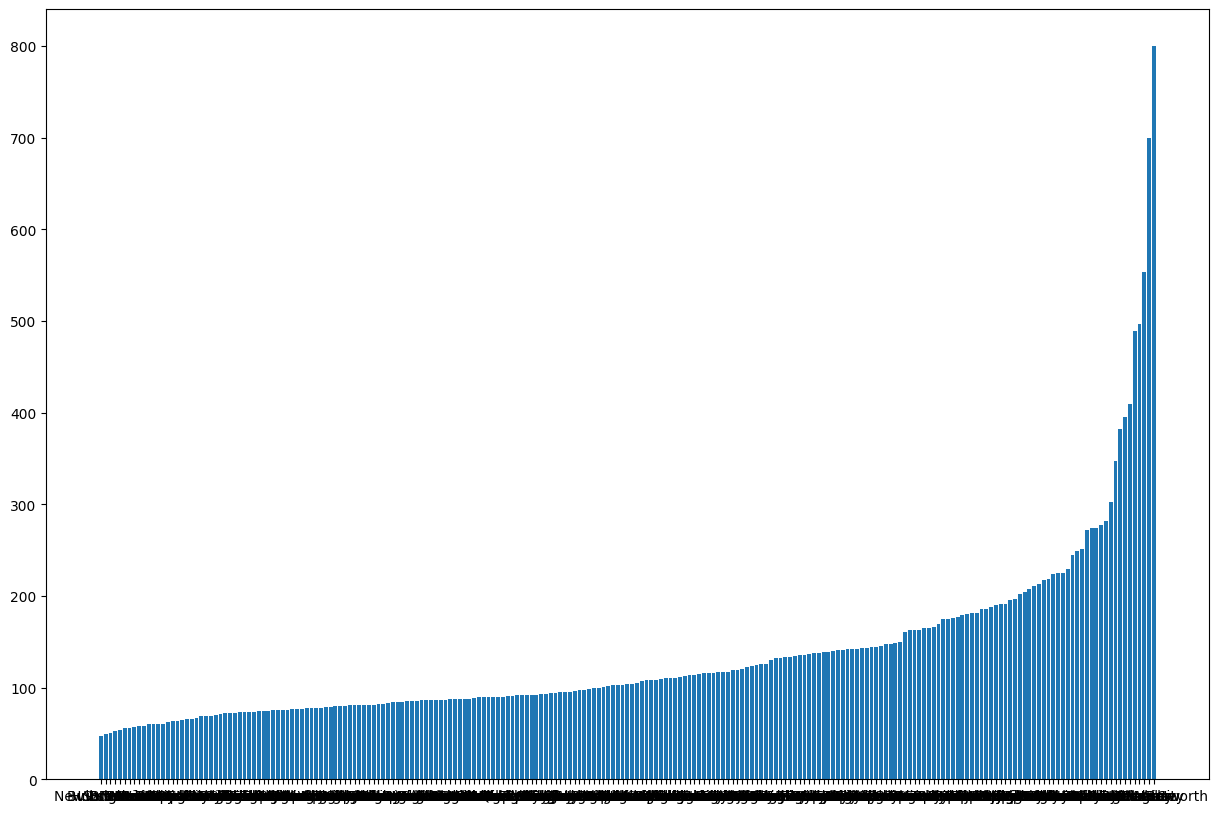

In [3]:
price = list()
indeces = list(df['neighbourhood'].unique())
for place in indeces:
    price.append(df[df['neighbourhood']==place]['price'].mean())
pr_arr = np.array(price)
ind = pr_arr.argsort()
pr_arr.sort()
x = np.arange(len(indeces))
labels = [indeces[i] for i in list(ind)]

fig, ax = plt.subplots(figsize=(15,10))
ax.bar(x,pr_arr,tick_label=labels)
plt.show()

In [4]:
lab_arr = np.array(labels)
(lab_arr[:20].mean(), lab_arr[-20:].mean())

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U26'), dtype('<U26')) -> None

In [13]:
(lab_arr[:10], lab_arr[-10:])

(array(['New Brighton', "Bull's Head", 'Hunts Point', 'Van Nest',
        'Soundview', 'Bronxdale', 'Tremont', 'New Dorp', 'Grant City',
        'Corona'], dtype='<U26'),
 array(['NoHo', 'Flatiron District', 'Randall Manor', 'Battery Park City',
        "Prince's Bay", 'Riverdale', 'Tribeca', 'Sea Gate', 'Woodrow',
        'Fort Wadsworth'], dtype='<U26'))

In [20]:
df[df['neighbourhood'].isin(lab_arr[-10:])]['neighbourhood_group'].unique()

array(['Manhattan', 'Brooklyn', 'Staten Island', 'Bronx'], dtype=object)

0        False
1        False
2        False
3        False
4        False
         ...  
39111    False
39112    False
39113    False
39114    False
39115    False
Name: neighbourhood, Length: 39116, dtype: bool

Poca availability_365 implica prezzi più bassi  

Calculated_host_listings_count è poco informativa  

Reviews per month poco informativa  

room_type è informativa --> si può fare label encoding  

neighbourhood_group è infomativa --> si può fare labelencoding: Bronx, Queens, Staten Island, Brooklyn, Manhattan  
    
minimum_nights non è informativa

## Vera Risoluzione

Elimino colonne 'name', 'host_name', 'last_review', 'neighbourhood'

In [3]:
df3 = df.drop(columns=['name', 'host_name', 'last_review', 'neighbourhood'])
df3

,id,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,12783632,57230304,Queens,40.74037,-73.88610,Private room,75,1,2,0.92,3,351
1,3463385,10698270,Manhattan,40.76717,-73.95532,Private room,95,1,202,3.31,2,263
2,17572926,36578169,Manhattan,40.77984,-73.94725,Entire home/apt,130,2,0,NaN,1,0
3,33913644,50981314,Brooklyn,40.70205,-73.91338,Entire home/apt,150,2,4,1.64,1,89
4,9405895,48775347,Brooklyn,40.68914,-73.97853,Entire home/apt,325,3,16,0.42,1,103
...,...,...,...,...,...,...,...,...,...,...,...,...
39111,20678811,147972663,Brooklyn,40.64850,-73.93855,Private room,40,3,58,2.57,3,306
39112,29630190,223032162,Brooklyn,40.68602,-73.99023,Private room,65,2,15,1.80,2,0
39113,3811639,10603767,Brooklyn,40.70784,-73.92224,Entire home/apt,150,3,203,3.42,1,308
39114,2404708,12290324,Brooklyn,40.71952,-73.96281,Entire home/apt,250,5,21,0.35,1,284


In [4]:
df3.fillna(0, inplace=True)

In [16]:
df3.replace({'neighbourhood_group': {'Bronx': 1, 'Queens': 2, 'Staten Island': 3, 'Brooklyn': 4, 'Manhattan': 5}, 'room_type': {'Shared room': 1, 'Private room': 2, 'Entire home/apt':3}}, inplace=True)
df3

,id,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,12783632,57230304,2,40.74037,-73.88610,2,75,1,2,0.92,3,351
1,3463385,10698270,5,40.76717,-73.95532,2,95,1,202,3.31,2,263
2,17572926,36578169,5,40.77984,-73.94725,3,130,2,0,0.00,1,0
3,33913644,50981314,4,40.70205,-73.91338,3,150,2,4,1.64,1,89
4,9405895,48775347,4,40.68914,-73.97853,3,325,3,16,0.42,1,103
...,...,...,...,...,...,...,...,...,...,...,...,...
39111,20678811,147972663,4,40.64850,-73.93855,2,40,3,58,2.57,3,306
39112,29630190,223032162,4,40.68602,-73.99023,2,65,2,15,1.80,2,0
39113,3811639,10603767,4,40.70784,-73.92224,3,150,3,203,3.42,1,308
39114,2404708,12290324,4,40.71952,-73.96281,3,250,5,21,0.35,1,284


In [17]:
y = df3['price'].values
df3.drop(columns=['price'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df3.values, y, test_size=0.2, random_state=42)

In [19]:
reg = RandomForestRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

0.13334888161476

## Nuova prova

In [4]:
col = list()
for ind in df.index:
    place = df.loc[ind, 'neighbourhood']
    col.append(labels.index(place)+1)
df['neighbourhood_encoded'] = col
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_encoded
0,12783632,NYC Mini Hotel,57230304,Imanuelly,Queens,Elmhurst,40.74037,-73.88610,Private room,75,1,2,2019-05-26,0.92,3,351,59
1,3463385,Gorgeous room in Manhattan,10698270,Evgenia,Manhattan,Upper East Side,40.76717,-73.95532,Private room,95,1,202,2019-05-27,3.31,2,263,190
2,17572926,Great 1 Bedroom on Upper East,36578169,James,Manhattan,Upper East Side,40.77984,-73.94725,Entire home/apt,130,2,0,NaN,NaN,1,0,190
3,33913644,"Modern and bright 2Bed 2Bath Bushwick, Brooklyn",50981314,Ofier,Brooklyn,Bushwick,40.70205,-73.91338,Entire home/apt,150,2,4,2019-07-07,1.64,1,89,67
4,9405895,Stylish and zen Brooklyn retreat,48775347,Mathieu,Brooklyn,Fort Greene,40.68914,-73.97853,Entire home/apt,325,3,16,2019-04-20,0.42,1,103,166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39111,20678811,Flatbush Comfy Room (Rm# 2),147972663,Hyacinth,Brooklyn,East Flatbush,40.64850,-73.93855,Private room,40,3,58,2019-06-12,2.57,3,306,115
39112,29630190,Cozy Brooklyn Heights - Private Room,223032162,Dot,Brooklyn,Boerum Hill,40.68602,-73.99023,Private room,65,2,15,2019-05-19,1.80,2,0,185
39113,3811639,Beautiful sun-filled Loft BROOKLYN,10603767,Samantha,Brooklyn,Bushwick,40.70784,-73.92224,Entire home/apt,150,3,203,2019-06-22,3.42,1,308,67
39114,2404708,Williamsburg 1 bedroom appartement,12290324,Lara,Brooklyn,Williamsburg,40.71952,-73.96281,Entire home/apt,250,5,21,2019-03-28,0.35,1,284,162


In [5]:
df4 = df.drop(columns=['name', 'host_name', 'last_review', 'neighbourhood'])
df4

,id,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_encoded
0,12783632,57230304,Queens,40.74037,-73.88610,Private room,75,1,2,0.92,3,351,59
1,3463385,10698270,Manhattan,40.76717,-73.95532,Private room,95,1,202,3.31,2,263,190
2,17572926,36578169,Manhattan,40.77984,-73.94725,Entire home/apt,130,2,0,NaN,1,0,190
3,33913644,50981314,Brooklyn,40.70205,-73.91338,Entire home/apt,150,2,4,1.64,1,89,67
4,9405895,48775347,Brooklyn,40.68914,-73.97853,Entire home/apt,325,3,16,0.42,1,103,166
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39111,20678811,147972663,Brooklyn,40.64850,-73.93855,Private room,40,3,58,2.57,3,306,115
39112,29630190,223032162,Brooklyn,40.68602,-73.99023,Private room,65,2,15,1.80,2,0,185
39113,3811639,10603767,Brooklyn,40.70784,-73.92224,Entire home/apt,150,3,203,3.42,1,308,67
39114,2404708,12290324,Brooklyn,40.71952,-73.96281,Entire home/apt,250,5,21,0.35,1,284,162


In [6]:
df4.fillna(0, inplace=True)

In [7]:
df4.replace({'neighbourhood_group': {'Bronx': 1, 'Queens': 2, 'Staten Island': 3, 'Brooklyn': 4, 'Manhattan': 5}, 'room_type': {'Shared room': 1, 'Private room': 2, 'Entire home/apt':3}}, inplace=True)
df4

,id,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_encoded
0,12783632,57230304,2,40.74037,-73.88610,2,75,1,2,0.92,3,351,59
1,3463385,10698270,5,40.76717,-73.95532,2,95,1,202,3.31,2,263,190
2,17572926,36578169,5,40.77984,-73.94725,3,130,2,0,0.00,1,0,190
3,33913644,50981314,4,40.70205,-73.91338,3,150,2,4,1.64,1,89,67
4,9405895,48775347,4,40.68914,-73.97853,3,325,3,16,0.42,1,103,166
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39111,20678811,147972663,4,40.64850,-73.93855,2,40,3,58,2.57,3,306,115
39112,29630190,223032162,4,40.68602,-73.99023,2,65,2,15,1.80,2,0,185
39113,3811639,10603767,4,40.70784,-73.92224,3,150,3,203,3.42,1,308,67
39114,2404708,12290324,4,40.71952,-73.96281,3,250,5,21,0.35,1,284,162


In [8]:
y = df4['price'].values
df4.drop(columns=['price'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df4.values, y, test_size=0.2, random_state=42)

In [9]:
reg = RandomForestRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

0.2127329108272733

In [13]:
reg.feature_importances_

array([0.13250681, 0.15209303, 0.01197798, 0.14462284, 0.12176837,
       0.06358812, 0.08566644, 0.03278004, 0.03698762, 0.04521272,
       0.09414826, 0.07864778])

In [17]:
df5 = df5.drop(columns=['id'])
X_train2, X_test2, y_train2, y_test2 = train_test_split(df5.values, y, test_size=0.2, random_state=42)

In [18]:
reg = RandomForestRegressor()
reg.fit(X_train2, y_train2)
y_pred = reg.predict(X_test2)
r2_score(y_test2, y_pred)

0.15009312061996438

In [19]:
reg.feature_importances_

array([0.02030694, 0.20862505, 0.19776834, 0.06432838, 0.11295498,
       0.047314  , 0.07146202, 0.07172965, 0.11568796, 0.08982267])

In [21]:
df6 = df4.drop(columns=['neighbourhood_encoded'])
X_train3, X_test3, y_train3, y_test3 = train_test_split(df5.values, y, test_size=0.2, random_state=42)

In [22]:
reg = RandomForestRegressor()
reg.fit(X_train3, y_train3)
y_pred = reg.predict(X_test3)
r2_score(y_test3, y_pred)

0.18656542025275624

In [23]:
reg.feature_importances_

array([0.02141793, 0.21822282, 0.19984928, 0.06583289, 0.1005397 ,
       0.04587064, 0.07444807, 0.07270588, 0.11126504, 0.08984775])

In [24]:
df6.columns

Index(['id', 'host_id', 'neighbourhood_group', 'latitude', 'longitude',
       'room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

## Cross Validation (inutile)

In [25]:
df4

,id,host_id,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_encoded
0,12783632,57230304,2,40.74037,-73.88610,2,1,2,0.92,3,351,59
1,3463385,10698270,5,40.76717,-73.95532,2,1,202,3.31,2,263,190
2,17572926,36578169,5,40.77984,-73.94725,3,2,0,0.00,1,0,190
3,33913644,50981314,4,40.70205,-73.91338,3,2,4,1.64,1,89,67
4,9405895,48775347,4,40.68914,-73.97853,3,3,16,0.42,1,103,166
...,...,...,...,...,...,...,...,...,...,...,...,...
39111,20678811,147972663,4,40.64850,-73.93855,2,3,58,2.57,3,306,115
39112,29630190,223032162,4,40.68602,-73.99023,2,2,15,1.80,2,0,185
39113,3811639,10603767,4,40.70784,-73.92224,3,3,203,3.42,1,308,67
39114,2404708,12290324,4,40.71952,-73.96281,3,5,21,0.35,1,284,162


In [37]:
reg = RandomForestRegressor()
cv_results = cross_validate(reg, df4.drop(columns=['neighbourhood_encoded']).values, y, scoring=['r2', 'neg_mean_squared_error'], return_train_score=True)

In [38]:
print(cv_results['test_r2'])

[0.16202305 0.08694089 0.14740632 0.15284994 0.01402984]


In [39]:
print(cv_results['train_r2'])

[0.87887215 0.86868019 0.87892692 0.87455531 0.87109181]


## Grid Search Cross Validation

In [10]:
df4

,id,host_id,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_encoded
0,12783632,57230304,2,40.74037,-73.88610,2,1,2,0.92,3,351,59
1,3463385,10698270,5,40.76717,-73.95532,2,1,202,3.31,2,263,190
2,17572926,36578169,5,40.77984,-73.94725,3,2,0,0.00,1,0,190
3,33913644,50981314,4,40.70205,-73.91338,3,2,4,1.64,1,89,67
4,9405895,48775347,4,40.68914,-73.97853,3,3,16,0.42,1,103,166
...,...,...,...,...,...,...,...,...,...,...,...,...
39111,20678811,147972663,4,40.64850,-73.93855,2,3,58,2.57,3,306,115
39112,29630190,223032162,4,40.68602,-73.99023,2,2,15,1.80,2,0,185
39113,3811639,10603767,4,40.70784,-73.92224,3,3,203,3.42,1,308,67
39114,2404708,12290324,4,40.71952,-73.96281,3,5,21,0.35,1,284,162


In [12]:
#'max_depth':(None,4,8)
reg = RandomForestRegressor(random_state=42)
params = {'n_estimators':(130,150,170), 'max_samples':(0.6,0.7,0.8), 'criterion':('squared_error', 'friedman_mse')}
clf = GridSearchCV(estimator = reg, param_grid = params, scoring = 'r2')
clf.fit(df4.values, y)
pd.DataFrame(clf.cv_results_).sort_values(by=['rank_test_score'])

KeyboardInterrupt: 

In [ ]:
1 prova: 'n_estimators':(70,100,130), 'max_samples':(0.8,0.9,1)  0.1582  MIGLIORI 130, 0.8
2 prova: 'n_estimators':(130,150,170), 'max_samples':(0.7,0.8)   0.1715  MIGLIORI 150, 0.7
3 prova: 'n_estimators':(90,130), 'criterion':('squared_error', 'friedman_mse'), 'max_samples':(0.8,0.9)  0.2170  MIGLIORI sqrt_error, 0.8, 130

## Evaluation

In [9]:
df_eval = pd.read_csv('NYC_Airbnb/evaluation.csv')
df_eval

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,2018-10-19,0.21,6,365
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,45,49,2017-10-05,0.40,1,0
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,2,118,2017-07-21,0.99,1,0
3,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,1,160,2019-06-09,1.33,4,188
4,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,2,148,2019-06-29,1.20,1,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9774,36478343,Welcome all as family,274273284,Anastasia,Manhattan,East Harlem,40.78749,-73.94749,Private room,1,0,NaN,NaN,1,180
9775,36481315,The Raccoon Artist Studio in Williamsburg New ...,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,1,0,NaN,NaN,3,365
9776,36482809,Stunning Bedroom NYC! Walking to Central Park!!,131529729,Kendall,Manhattan,East Harlem,40.79633,-73.93605,Private room,2,0,NaN,NaN,2,353
9777,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,2,0,NaN,NaN,2,9


In [10]:
col = list()
for ind in df_eval.index:
    place = df_eval.loc[ind, 'neighbourhood']
    col.append(labels.index(place)+1)
df_eval['neighbourhood_encoded'] = col
df_eval

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_encoded
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,2018-10-19,0.21,6,365,93
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,45,49,2017-10-05,0.40,1,0,119
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,2,118,2017-07-21,0.99,1,0,199
3,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,1,160,2019-06-09,1.33,4,188,170
4,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,2,148,2019-06-29,1.20,1,46,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9774,36478343,Welcome all as family,274273284,Anastasia,Manhattan,East Harlem,40.78749,-73.94749,Private room,1,0,NaN,NaN,1,180,146
9775,36481315,The Raccoon Artist Studio in Williamsburg New ...,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,1,0,NaN,NaN,3,365,162
9776,36482809,Stunning Bedroom NYC! Walking to Central Park!!,131529729,Kendall,Manhattan,East Harlem,40.79633,-73.93605,Private room,2,0,NaN,NaN,2,353,146
9777,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,2,0,NaN,NaN,2,9,119


In [11]:
df_eval = df_eval.drop(columns=['name', 'host_name', 'last_review', 'neighbourhood'])
df_eval

,id,host_id,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_encoded
0,2539,2787,Brooklyn,40.64749,-73.97237,Private room,1,9,0.21,6,365,93
1,5121,7356,Brooklyn,40.68688,-73.95596,Private room,45,49,0.40,1,0,119
2,5203,7490,Manhattan,40.80178,-73.96723,Private room,2,118,0.99,1,0,199
3,5238,7549,Manhattan,40.71344,-73.99037,Entire home/apt,1,160,1.33,4,188,170
4,6848,15991,Brooklyn,40.70837,-73.95352,Entire home/apt,2,148,1.20,1,46,162
...,...,...,...,...,...,...,...,...,...,...,...,...
9774,36478343,274273284,Manhattan,40.78749,-73.94749,Private room,1,0,NaN,1,180,146
9775,36481315,208514239,Brooklyn,40.71232,-73.94220,Entire home/apt,1,0,NaN,3,365,162
9776,36482809,131529729,Manhattan,40.79633,-73.93605,Private room,2,0,NaN,2,353,146
9777,36484665,8232441,Brooklyn,40.67853,-73.94995,Private room,2,0,NaN,2,9,119


In [12]:
df_eval.fillna(0, inplace=True)

In [13]:
df_eval.replace({'neighbourhood_group': {'Bronx': 1, 'Queens': 2, 'Staten Island': 3, 'Brooklyn': 4, 'Manhattan': 5}, 'room_type': {'Shared room': 1, 'Private room': 2, 'Entire home/apt':3}}, inplace=True)
df_eval

,id,host_id,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_encoded
0,2539,2787,4,40.64749,-73.97237,2,1,9,0.21,6,365,93
1,5121,7356,4,40.68688,-73.95596,2,45,49,0.40,1,0,119
2,5203,7490,5,40.80178,-73.96723,2,2,118,0.99,1,0,199
3,5238,7549,5,40.71344,-73.99037,3,1,160,1.33,4,188,170
4,6848,15991,4,40.70837,-73.95352,3,2,148,1.20,1,46,162
...,...,...,...,...,...,...,...,...,...,...,...,...
9774,36478343,274273284,5,40.78749,-73.94749,2,1,0,0.00,1,180,146
9775,36481315,208514239,4,40.71232,-73.94220,3,1,0,0.00,3,365,162
9776,36482809,131529729,5,40.79633,-73.93605,2,2,0,0.00,2,353,146
9777,36484665,8232441,4,40.67853,-73.94995,2,2,0,0.00,2,9,119


In [18]:
reg = clf.best_estimator_
reg.fit(df4.values, y)
y_pred = reg.predict(df_eval.values)

In [15]:
reg = RandomForestRegressor(n_estimators=130, max_samples=0.8, random_state=42, max_features='sqrt')
reg.fit(df4.values,y)
y_pred = reg.predict(df_eval.values)

In [10]:
reg.feature_importances_

array([0.12180133, 0.16193473, 0.01536324, 0.13470377, 0.14339521,
       0.06640648, 0.07666548, 0.02937288, 0.0383696 , 0.05000794,
       0.08362173, 0.07835761])

In [20]:
solution = pd.DataFrame({'Id': df_eval['id'].values, 'Predicted': y_pred})
solution.to_csv(path_or_buf='regr_300781.csv', index=False)

## Scatterplot

In [27]:
def scatter_price(df_dev, df_eva, price, price_pred):
    fig, ax = plt.subplots(1,2, figsize=(12,5))
    price = np.log(price+1)
    price_pred = np.log(price_pred+1)
    cmap = get_cmap('hot')
    vmin = min(price.min(), price_pred.min())
    vmax = max(price.max(), price_pred.max())
    prima = ax[0].scatter(df_dev['longitude'].values, df_dev['latitude'].values, vmin=vmin, vmax=vmax, c=price, cmap = cmap, alpha=0.4, s=3)
    seconda = ax[1].scatter(df_eva['longitude'].values, df_eva['latitude'].values, vmin=vmin, vmax=vmax, c=price_pred, cmap = cmap, alpha=0.4, s=3)
    cb1 = fig.colorbar(prima)
    cb1.set_label('LogPrice')
    cb2 = fig.colorbar(seconda)
    cb2.set_label('LogPrice')
    ax[0].set_xlabel('Longitude')
    ax[0].set_ylabel('Latitude')
    ax[1].set_xlabel('Longitude')
    ax[1].set_ylabel('Latitude')
    #plt.show()
    fig.savefig('heatmap.png')
    plt.close(fig)

In [28]:
scatter_price(df4, df_eval, y, y_pred)

AttributeError: 'NoneType' object has no attribute 'savefig'

In [44]:
#cmap = get_cmap('hot')

norm = matplotlib.colors.Normalize(vmin=np.log(y_pred).min(), vmax=np.log(y_pred).max())

In [45]:
list(norm(y_pred))

[26.48235119965105,
 28.398952888112508,
 19.41497946746199,
 45.007431649176915,
 38.28768645805293,
 26.874982962550437,
 30.922349119236664,
 166.21580547420152,
 37.721241424621,
 14.632010719414849,
 17.397504005923608,
 56.794144057164594,
 46.52364205373306,
 39.90942634828955,
 46.78436195953187,
 50.02784174000511,
 19.340488065805186,
 48.85149835550812,
 29.632716728053285,
 47.33683985515315,
 19.169778603675017,
 15.497973263675169,
 51.112622776632286,
 56.47755560012318,
 23.886015471071275,
 33.29676254704722,
 35.38096988923648,
 19.11701386083478,
 44.18181861414736,
 17.925151434325958,
 15.979063566042013,
 36.81027365852636,
 37.17186733740209,
 52.558997492135184,
 27.331242797698348,
 42.58025347852613,
 20.346121988172012,
 21.63575437935539,
 33.779404753615246,
 47.578936910537756,
 22.28134652704767,
 16.478776718823056,
 14.948599176456257,
 11.756332234622068,
 20.87532132077554,
 52.40070326361448,
 65.12321390491573,
 36.118124384798584,
 26.9944795860415

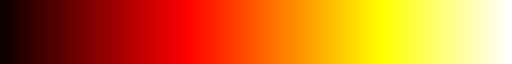

In [39]:
cmap = get_cmap('hot')
cmap

In [47]:
cmap(list(norm(np.log(y_pred))))

array([[0.91666174, 0.        , 0.        , 1.        ],
       [0.95784112, 0.        , 0.        , 1.        ],
       [0.76223908, 0.        , 0.        , 1.        ],
       ...,
       [0.8137133 , 0.        , 0.        , 1.        ],
       [0.6489958 , 0.        , 0.        , 1.        ],
       [0.53575251, 0.        , 0.        , 1.        ]])

In [46]:
list(norm(np.log(y_pred)))

[0.3346444252221381,
 0.34841275261550714,
 0.27377805788130616,
 0.4396290306431237,
 0.40751329095927635,
 0.3375425377504579,
 0.36521582001687825,
 0.701084973035216,
 0.40455714106832547,
 0.21885563650617493,
 0.25240392639610754,
 0.48595583535368575,
 0.4462193012561208,
 0.4157448473431261,
 0.44733115250724126,
 0.4606739561688725,
 0.2730278337277114,
 0.45593614929868026,
 0.35680318158726876,
 0.449667161381997,
 0.2712979743434242,
 0.22997258924697528,
 0.46494652468787906,
 0.4848409636408784,
 0.3143550428525817,
 0.37984299641718605,
 0.3918627358578004,
 0.2707602757756093,
 0.43594783325072023,
 0.25821640821011416,
 0.23589384540175803,
 0.3997102440326241,
 0.4016480999399087,
 0.4705060732710265,
 0.3408588250209062,
 0.42860945711670495,
 0.2829277914889173,
 0.2949515830082661,
 0.3826908134454867,
 0.4506823437446963,
 0.300711838350964,
 0.24186566754412558,
 0.22299128166444074,
 0.17681044241138594,
 0.2879487339502646,
 0.46990503743576806,
 0.513270485101

In [50]:
cmap(y_pred)

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       ...,
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [61]:
y.min()

0

In [62]:
y.max()

10000